## Лабораторна робота 5

### Метод ліктя. Кластерізація даних

In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import silhouette_score, accuracy_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


# Завдання 1

#### Завантажити датасет Ірис. Роздрукувати перші 5 рядочків <<

In [2]:
iris = datasets.load_iris()
data = iris.data
target = iris.target

In [3]:
print(pd.DataFrame(data, columns=iris.feature_names).head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


<p>Методом ліктя і методом силуетів визначити оптимальну кількість кластерів.<</p>

<p>Маштабуємо дані</p>

In [4]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data)

In [5]:
X_2d = pd.DataFrame(X_scaled, columns=iris.feature_names).iloc[:, 1:]

<p>Застосування ліктевого методу для визначення оптимальної кількості кластерів</p>

In [6]:
wcss_2d = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=100, n_init=10, random_state=0)
    kmeans.fit(X_2d)
    wcss_2d.append(kmeans.inertia_)

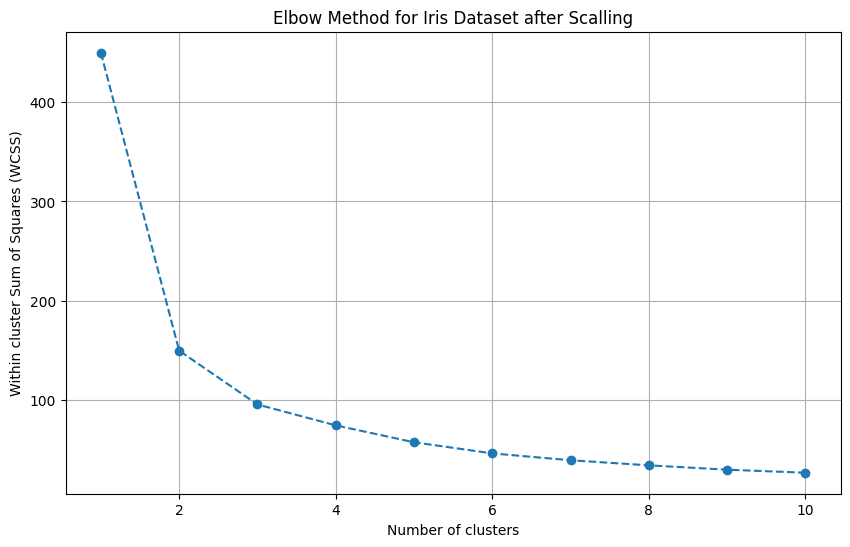

In [7]:
plt.figure(figsize=(10,6))
plt.plot(range(1, 11), wcss_2d, marker='o', linestyle='--')
plt.title('Elbow Method for Iris Dataset after Scalling')
plt.xlabel('Number of clusters')
plt.ylabel('Within cluster Sum of Squares (WCSS)')
plt.grid(True)
plt.show()

<p>За методом ліктя оптимальна кілкість кластерів = 2</p>

<p>Застосування методу силуетів для визначення оптимальної кількості кластерів</p>

In [8]:
silhouette_scores = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    cluster_labels = kmeans.fit_predict(X_2d)
    silhouette_avg = silhouette_score(X_2d, cluster_labels)
    silhouette_scores.append(silhouette_avg)

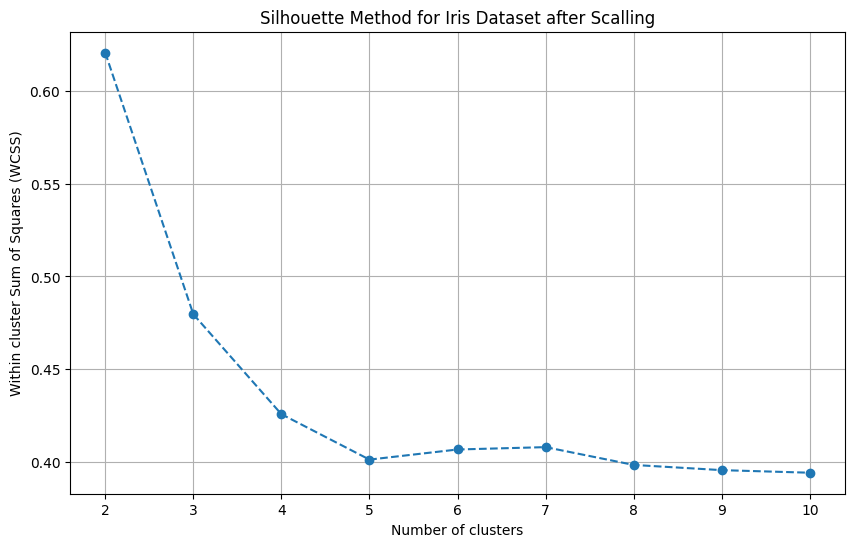

In [9]:
plt.figure(figsize=(10,6))
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='--')
plt.title('Silhouette Method for Iris Dataset after Scalling')
plt.xlabel('Number of clusters')
plt.ylabel('Within cluster Sum of Squares (WCSS)')
plt.grid(True)
plt.show()

<p>Максимальна точка на графіку x=2</p>

<p>Візуалізація кластерів</p>

In [10]:
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

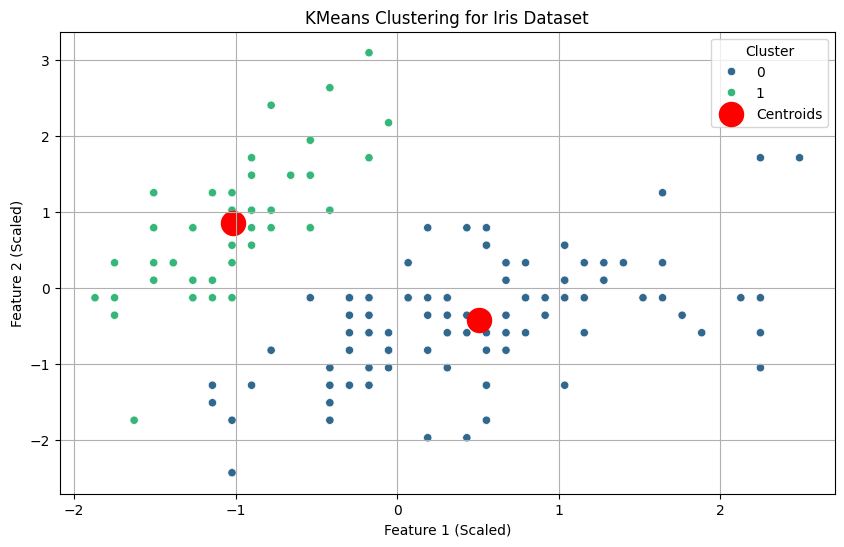

In [11]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=clusters, palette='viridis', legend='full')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Centroids')
plt.title('KMeans Clustering for Iris Dataset')
plt.xlabel('Feature 1 (Scaled)')
plt.ylabel('Feature 2 (Scaled)')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

<p><b>Висновки</b></p>
<p><ul>
    <li>було досліджено метод ліктя та метод силуетів</li>
    <li>обидва методи показали однакову оптимальну к-сть кластерів для даної задачі (2)</li>
</ul></p>

## Завдання 2

### Завантажити датасет Student_data.csv (датасет з Kaggle)
### Роздрукувати перші 5 рядків

In [12]:
students = pd.read_csv('Student_performance_data.csv')
students.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


<p>Вивести розмір датасета, типи даних</p>

In [13]:
students.shape

(2392, 15)

In [14]:
students.dtypes

StudentID              int64
Age                    int64
Gender                 int64
Ethnicity              int64
ParentalEducation      int64
StudyTimeWeekly      float64
Absences               int64
Tutoring               int64
ParentalSupport        int64
Extracurricular        int64
Sports                 int64
Music                  int64
Volunteering           int64
GPA                  float64
GradeClass           float64
dtype: object

<p>Перевірити на пропущені значення. При наявності замінити на середнє за стовпцем.</p>

In [15]:
students.isnull().sum()

StudentID            0
Age                  0
Gender               0
Ethnicity            0
ParentalEducation    0
StudyTimeWeekly      0
Absences             0
Tutoring             0
ParentalSupport      0
Extracurricular      0
Sports               0
Music                0
Volunteering         0
GPA                  0
GradeClass           0
dtype: int64

<p>Пропущених значень не виявлено.</p>

<p>Перевірити а дублікати. Якщо є - видалити. Вивести описову статистику.</p>

In [16]:
students.duplicated().sum()

0

<p>Дублікатів не виявлено.</p>

In [17]:
students.describe()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
count,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000
mean,2196.500000,16.468645,0.510870,0.877508,1.746237,9.771992,14.541388,0.301421,2.122074,0.383361,0.303512,0.196906,0.157191,1.906186,2.983696
std,690.655244,1.123798,0.499986,1.028476,1.000411,5.652774,8.467417,0.458971,1.122813,0.486307,0.459870,0.397744,0.364057,0.915156,1.233908
min,1001.000000,15.000000,0.000000,0.000000,0.000000,0.001057,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1598.750000,15.000000,0.000000,0.000000,1.000000,5.043079,7.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.174803,2.000000
50%,2196.500000,16.000000,1.000000,0.000000,2.000000,9.705363,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.893393,4.000000
75%,2794.250000,17.000000,1.000000,2.000000,2.000000,14.408410,22.000000,1.000000,3.000000,1.000000,1.000000,0.000000,0.000000,2.622216,4.000000
max,3392.000000,18.000000,1.000000,3.000000,4.000000,19.978094,29.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000


<p></p>

#### Ця задача - задача класифікації.

In [18]:
X = students.drop('GradeClass', axis=1)
y = students['GradeClass']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### 1. Random forest

In [21]:
param_grid_rf = {
    'n_estimators':[100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10], 
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestClassifier(random_state=42)

grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=5, n_jobs=-1, verbose=2)
grid_search_rf.fit(X_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             verbose=2)

In [22]:
print('Best parameters for Random forest:', grid_search_rf.best_params_)
print('Best cross-validation accuracy for Random Forest:', grid_search_rf.best_score_)

Best parameters for Random forest: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best cross-validation accuracy for Random Forest: 0.9210640711932525


<p>Оцінка не тестовій вибірці.</p>

In [23]:
y_pred_rf = grid_search_rf.predict(X_test)
print('Test accuracy for Random Forest:', accuracy_score(y_test, y_pred_rf))

Test accuracy for Random Forest: 0.9123173277661796


### 2. Support Vector Machine

In [24]:
param_grid_svc = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': [0.1, 1, 'scale', 'auto']
}

In [25]:
grid_search = GridSearchCV(
    estimator=SVC(),
    param_grid=param_grid_svc,
    cv=5,  
    n_jobs=-1,
    verbose=2
)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [0.1, 1, 'scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly']},
             verbose=2)

In [26]:
print('Best parameters for Support Vector Classifier:', grid_search.best_params_)
print('Best cross-validation accuracy for Support Vector Classifier:', grid_search.best_score_)

Best parameters for Support Vector Classifier: {'C': 10, 'gamma': 0.1, 'kernel': 'linear'}
Best cross-validation accuracy for Support Vector Classifier: 0.8557147348707502


<p>Оцінка не тестовій вибірці.</p>

In [27]:
y_pred_svc = grid_search.predict(X_test)
print('Test accuracy for Support Vector Classifier:', accuracy_score(y_test, y_pred_svc))

Test accuracy for Support Vector Classifier: 0.824634655532359


### 3. K-Neighbors

In [28]:
param_grid_kn = {
    'n_neighbors': range(1, 18, 2),
    'weights': ['uniform', 'distance'],
    'metric': ['minkowski', 'euclidean', 'manhattan']
}

In [29]:
knn = KNeighborsClassifier()
grid_search_kn = GridSearchCV(
    estimator=knn,
    param_grid=param_grid_kn,
    cv=5,  
    n_jobs=-1, 
    verbose=2
)
grid_search_kn.fit(X_train, y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['minkowski', 'euclidean', 'manhattan'],
                         'n_neighbors': range(1, 18, 2),
                         'weights': ['uniform', 'distance']},
             verbose=2)

In [30]:
print('Best parameters for K-Neighbors:', grid_search_kn.best_params_)
print('Best cross-validation accuracy for K-Neighbors:', grid_search_kn.best_score_)

Best parameters for K-Neighbors: {'metric': 'manhattan', 'n_neighbors': 13, 'weights': 'uniform'}
Best cross-validation accuracy for K-Neighbors: 0.7354749634328053


<p>Оцінка не тестовій вибірці.</p>

In [31]:
y_pred_kn = grid_search_kn.predict(X_test)
print('Test accuracy for Support Vector Classifier:', accuracy_score(y_test, y_pred_kn))

Test accuracy for Support Vector Classifier: 0.7098121085594989


<p>Серед трьох моделей: Random Forest, Support Vector Machine, K-Neighbors, найвища точніть у прогнозних даних моделі Random Forest.</p>

#### Застосування ліктевого методу для визначення оптимальної кількості кластерів. (Виключаємо з даних стовпець з id).

In [32]:
X_2dd = students.loc[:, students.columns != 'StudentID']
wcss_2dd = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=100, n_init=10, random_state=0)
    kmeans.fit(X_2dd)
    wcss_2dd.append(kmeans.inertia_)

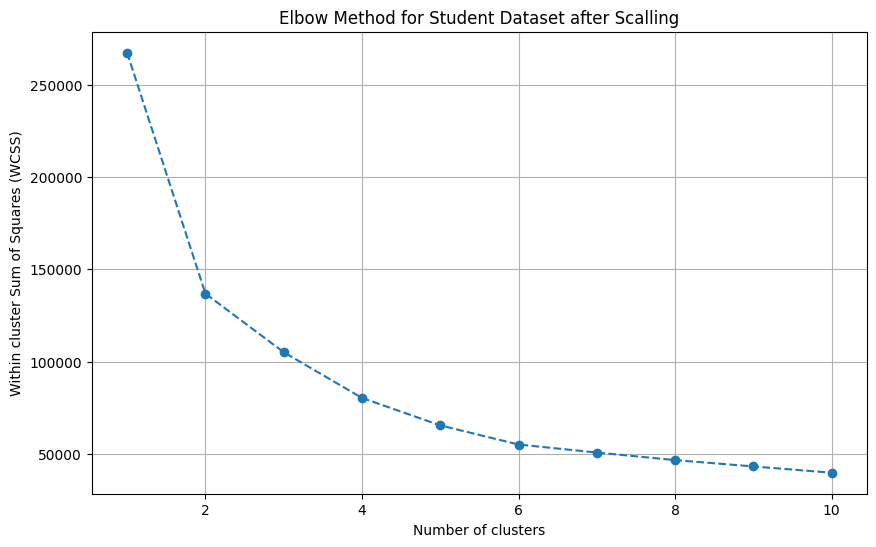

In [33]:
plt.figure(figsize=(10,6))
plt.plot(range(1, 11), wcss_2dd, marker='o', linestyle='--')
plt.title('Elbow Method for Student Dataset after Scalling')
plt.xlabel('Number of clusters')
plt.ylabel('Within cluster Sum of Squares (WCSS)')
plt.grid(True)
plt.show()

<p>За методом ліктя найоптимальніша к-сть кластерів - 2.</p>

<p>Застосування методу силуетів для визначення оптимальної кількості кластерів</p>

In [34]:
silhouette_scoress = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    cluster_labels = kmeans.fit_predict(X_2dd)
    silhouette_avg = silhouette_score(X_2dd, cluster_labels)
    silhouette_scoress.append(silhouette_avg)

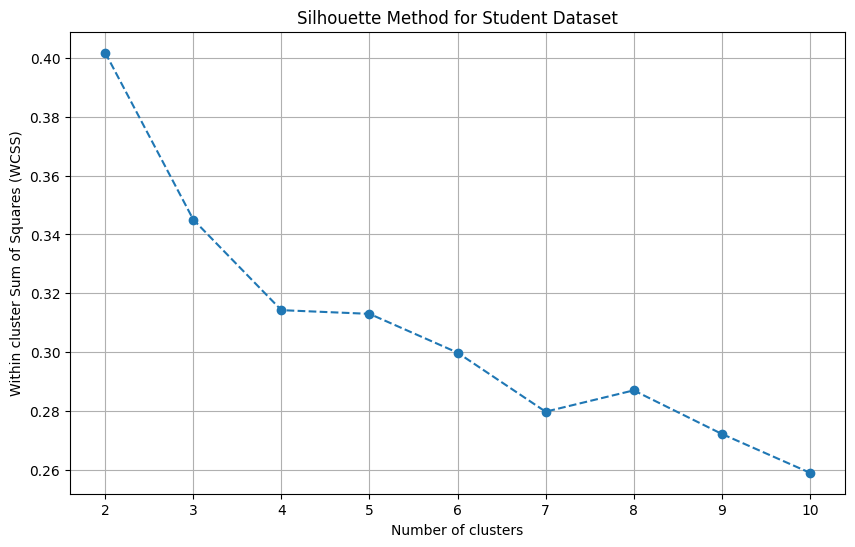

In [35]:
plt.figure(figsize=(10,6))
plt.plot(range(2, 11), silhouette_scoress, marker='o', linestyle='--')
plt.title('Silhouette Method for Student Dataset')
plt.xlabel('Number of clusters')
plt.ylabel('Within cluster Sum of Squares (WCSS)')
plt.grid(True)
plt.show()

<p>За методом силуетів найвища точка x=2.</p>

#### Візуалізація кластерів.

In [36]:
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, random_state=42)
clusters = kmeans.fit_predict(X_train)

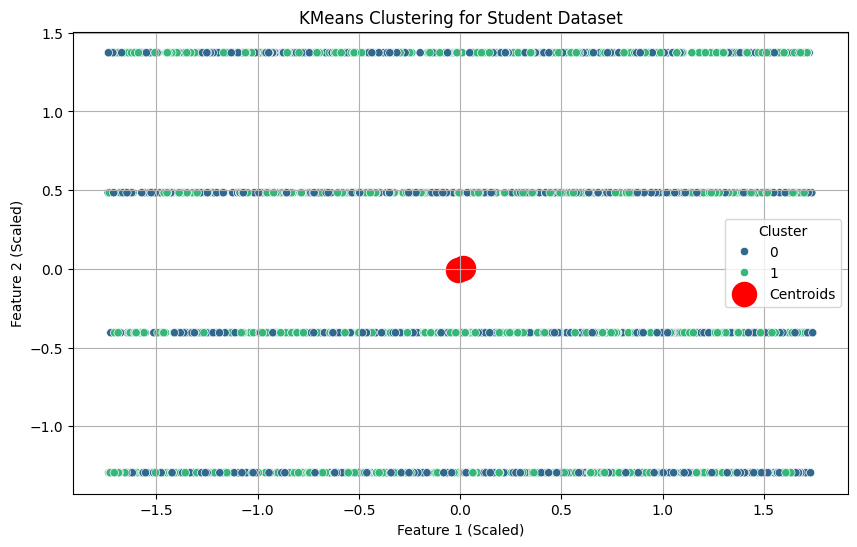

In [37]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=X_train[:, 0], y=X_train[:, 1], hue=clusters, palette='viridis', legend='full')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Centroids')
plt.title('KMeans Clustering for Student Dataset')
plt.xlabel('Feature 1 (Scaled)')
plt.ylabel('Feature 2 (Scaled)')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

## Висновки:
##### датасет Students містить 2392 рядків та 15 стовпців
##### дана задача - задача класифікації
##### cеред трьох моделей: Random Forest, Support Vector Machine, K-Neighbors, найвища точніть у прогнозних даних моделі Random Forest
##### оптимальна к-сть кластерів за медотом ліктя та силуетів = 2
